# wrangling with the csv

In [1]:
import pandas as pd
import numpy as np
# import statsmodels.discrete.discrete_model as sm
import statsmodels as stt
import scipy.stats as sst
import os.path as osp

In [2]:
from statsmodels import api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import json
%matplotlib inline

### read the mapping file to find the correspondance between uberon numbers and labels

In [3]:
# find mapping file
# mapping_file = '../segstats_jsonld/segstats_jsonld/mapping_data/freesurfermap.json'
mapping_file = '../segstats_jsonld/segstats_jsonld/mapping_data/freesurfer-cdes.json'
assert osp.exists(mapping_file)
with open(mapping_file, "r") as read_file:
    roi_map = json.load(read_file)

In [4]:
print(len(list(roi_map.keys())))
print(list(roi_map.keys())[:10])
#print(list(roi_map['Anatomy'].keys())[:10])
#print(len(roi_map['Anatomy'].keys()))
print(roi_map[list(roi_map.keys())[10]])

3580
['count', "FS(structure='Cortex', hemi=None, measure='NumVert', unit='unitless')", "FS(structure='Cortex', hemi=None, measure='WhiteSurfArea', unit='mm^2')", "FS(structure='BrainSeg', hemi=None, measure='BrainSegVol', unit='mm^3')", "FS(structure='BrainSegNotVent', hemi=None, measure='BrainSegVolNotVent', unit='mm^3')", "FS(structure='BrainSegNotVentSurf', hemi=None, measure='BrainSegVolNotVentSurf', unit='mm^3')", "FS(structure='Cortex', hemi=None, measure='CortexVol', unit='mm^3')", "FS(structure='SupraTentorial', hemi=None, measure='SupraTentorialVol', unit='mm^3')", "FS(structure='SupraTentorialNotVent', hemi=None, measure='SupraTentorialVolNotVent', unit='mm^3')", "FS(structure='EstimatedTotalIntraCranialVol', hemi=None, measure='eTIV', unit='mm^3')"]
{'id': '000010', 'structure_id': 410, 'label': 'Right BA1_exvivo NumVert', 'description': 'Right BA1_exvivo Number of Vertices (unitless)', 'key_source': 'Table', 'measureOf': 'http://uri.interlex.org/base/ilx_0112559', 'datumTy

In [5]:
for k,v in roi_map.items():
    # print(k,"->",v)
    pass
v = {1:2}
print(type(v))


<class 'dict'>


In [6]:
# ube is a dictionary that maps uberon to label of structure
ube = {}
ebu = {}
countok=0
has_no_isAbout = []
has_no_label = []

for (k,v) in roi_map.items():
    if k == 'count': pass

    # v is a dict that contains the CDE - check that we have a isAbout
    #if ('isAbout' not in v) or (v['isAbout'] == '') or (v['isAbout'] in ('None','none')):
    #    has_no_isAbout.append(k)
    #    break
        
    elif 'isAbout' in v:
        countok += 1
        if 'label' in v:
            if v['label'] != '' and v['label'] not in ('None','none'):
                #ube['<' + v['isAbout'] + '>'] = v['label']
                #ebu[v['label']] = '<' + v['isAbout'] + '>'
                ebu[v['label']] = v['isAbout']
                if v['isAbout'] not in ube.keys():
                    no_right_or_left = v['label']
                    no_right_or_left = no_right_or_left.replace('Right-','')
                    no_right_or_left = no_right_or_left.replace('Right ','')
                    no_right_or_left = no_right_or_left.replace('Left-','')
                    no_right_or_left = no_right_or_left.replace('Left ','')
                    no_right_or_left = no_right_or_left.replace(' NVoxels','')
                    no_right_or_left = no_right_or_left.replace(' (mm^3)','')
                    ube[v['isAbout']] = no_right_or_left
            else:
                has_no_label.append(k)

print(has_no_isAbout)
#print(ube)
#print(ebu)
print(countok , len(ebu))

[]
262 262


In [7]:
ube

{'http://purl.obolibrary.org/obo/UBERON_0000956': 'Number of Vertices',
 'http://purl.obolibrary.org/obo/UBERON_0000955': 'Brain Segmentation Volume',
 'http://purl.obolibrary.org/obo/UBERON_0001869': 'Supratentorial volume',
 'http://purl.obolibrary.org/obo/UBERON_0013411': 'Estimated Total Intracranial Volume',
 'http://purl.obolibrary.org/obo/UBERON_0002437': 'hemisphere cerebral white matter volume',
 'http://purl.obolibrary.org/obo/UBERON_0005401': 'Total gray matter volume',
 'http://purl.obolibrary.org/obo/UBERON_0002285': 'Lateral-Ventricle',
 'http://purl.obolibrary.org/obo/UBERON_0006091': 'Inf-Lat-Vent',
 'http://purl.obolibrary.org/obo/UBERON_0002317': 'Cerebellum-White-Matter',
 'http://purl.obolibrary.org/obo/UBERON_0002129': 'Cerebellum-Cortex',
 'http://purl.obolibrary.org/obo/UBERON_0001897': 'Thalamus-Proper',
 'http://purl.obolibrary.org/obo/UBERON_0001873': 'Caudate',
 'http://purl.obolibrary.org/obo/UBERON_0001874': 'Putamen',
 'http://purl.obolibrary.org/obo/UBERO

In [8]:
#
"""
ube = {}
has_no_isAbout = []
for (k,v) in roi_map['Anatomy'].items():
    if v['isAbout'] != '' or v['isAbout'] in ('None','none'):
        if v['label'] != '' and v['label'] not in ('None','none'):
            ube['<' + v['isAbout'] + '>'] = v['label']
        else:
            if '<' + v['isAbout'] + '>' not in ube.keys():
                if v['hasLaterality'] in ('Right','Left'):
                    ube['<' + v['isAbout'] + '>'] = 'strip-Right-Left-of-'+k
                else:
                    ube['<' + v['isAbout'] + '>'] = k
    else:
        #print(k, 'has no isAbout')
        has_no_isAbout.append(k)
print(has_no_isAbout)
""";

In [9]:
list(zip(list(ube)[:5],list(ube.values())[:5]))

[('http://purl.obolibrary.org/obo/UBERON_0000956', 'Number of Vertices'),
 ('http://purl.obolibrary.org/obo/UBERON_0000955',
  'Brain Segmentation Volume'),
 ('http://purl.obolibrary.org/obo/UBERON_0001869', 'Supratentorial volume'),
 ('http://purl.obolibrary.org/obo/UBERON_0013411',
  'Estimated Total Intracranial Volume'),
 ('http://purl.obolibrary.org/obo/UBERON_0002437',
  'hemisphere cerebral white matter volume')]

### Read CSV file 

In [10]:
print(osp.realpath(osp.curdir))
relative_path_filename = './data/data.csv'
assert osp.exists(relative_path_filename)

/home/jb/code/repronim/simple2/simple2_analysis


In [11]:
hie = pd.read_csv(relative_path_filename, na_values='nd') #, low_memory=False)
original_col_names = list(hie)
print(original_col_names)
assert len(original_col_names) == len(set(original_col_names))
hie = hie[(hie['FIQ'] > 0)]
print(list(hie))

['rowid', 'study', 'ID', 'Age', 'dx', 'Gender', 'FIQ', 'PIQ', 'VIQ', 'tool', 'softwareLabel', 'federatedLabel', 'laterality', 'volume']
['rowid', 'study', 'ID', 'Age', 'dx', 'Gender', 'FIQ', 'PIQ', 'VIQ', 'tool', 'softwareLabel', 'federatedLabel', 'laterality', 'volume']


/home/jb/virtualenvs/simple2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
# col_rename = {'softwareLabel':'software', 'federatedLabel':'structure'}
col_rename = {'federatedLabel':'structure'}
hie.rename(columns=col_rename, inplace=True)

In [13]:
# how many abide / adhd ?
cond = (hie['study'].str.contains("ABIDE"))
print(len(set(hie[cond]['ID'])))
# print(set(hie['study']))
cond = (hie['study'] == 'ADHD200')
print(len(set(hie[cond]['ID'])))


918
231


In [14]:
# Structure in the csv should contain the uberon identifier for the structure
structures = set(hie.structure)
print(structures)

{nan, 'http://purl.obolibrary.org/obo/UBERON_0002336', 'http://purl.obolibrary.org/obo/UBERON_0015708', 'http://purl.obolibrary.org/obo/UBERON_0002129', 'http://purl.obolibrary.org/obo/UBERON_0015599', 'http://purl.obolibrary.org/obo/UBERON_0002437', 'http://purl.obolibrary.org/obo/UBERON_0001873', 'http://purl.obolibrary.org/obo/UBERON_0000959', 'http://purl.obolibrary.org/obo/UBERON_0001869', 'http://purl.obolibrary.org/obo/UBERON_0001897', 'http://purl.obolibrary.org/obo/UBERON_0013411', 'http://purl.obolibrary.org/obo/UBERON_0009857', 'http://purl.obolibrary.org/obo/UBERON_0002286', 'http://purl.obolibrary.org/obo/UBERON_0001882', 'http://purl.obolibrary.org/obo/UBERON_0002422', 'http://purl.obolibrary.org/obo/UBERON_0001954', 'http://purl.obolibrary.org/obo/UBERON_0000955', 'http://purl.obolibrary.org/obo/UBERON_0001981', 'http://purl.obolibrary.org/obo/UBERON_0005401', 'http://purl.obolibrary.org/obo/UBERON_0006514', 'http://purl.obolibrary.org/obo/UBERON_0001874', 'http://purl.o

In [15]:
# for each structure found in the csv, give it the name of the structure found
# in the CDE mapping file 

ube2h = {}

for idx, s in enumerate(structures):
    if s is not np.nan:
        ube2h[s] = ube[s]
        print(idx, s, ube2h[s])

len(ube), len(ube2h)

1 http://purl.obolibrary.org/obo/UBERON_0002336 CC_Central
2 http://purl.obolibrary.org/obo/UBERON_0015708 CC_Posterior
3 http://purl.obolibrary.org/obo/UBERON_0002129 Cerebellum-Cortex
4 http://purl.obolibrary.org/obo/UBERON_0015599 CC_Anterior
5 http://purl.obolibrary.org/obo/UBERON_0002437 hemisphere cerebral white matter volume
6 http://purl.obolibrary.org/obo/UBERON_0001873 Caudate
7 http://purl.obolibrary.org/obo/UBERON_0000959 Optic-Chiasm
8 http://purl.obolibrary.org/obo/UBERON_0001869 Supratentorial volume
9 http://purl.obolibrary.org/obo/UBERON_0001897 Thalamus-Proper
10 http://purl.obolibrary.org/obo/UBERON_0013411 Estimated Total Intracranial Volume
11 http://purl.obolibrary.org/obo/UBERON_0009857 5th-Ventricle
12 http://purl.obolibrary.org/obo/UBERON_0002286 3rd-Ventricle
13 http://purl.obolibrary.org/obo/UBERON_0001882 Accumbens-area
14 http://purl.obolibrary.org/obo/UBERON_0002422 4th-Ventricle
15 http://purl.obolibrary.org/obo/UBERON_0001954 Hippocampus
16 http://purl.o

(28, 28)

In [16]:
"""
looking at the class name from the purl urls I got :

u2human[list(u2human.keys())[0]] = 'cavum septum pellucidum'
u2human[list(u2human.keys())[1]] = 'cerebellum'
u2human[list(u2human.keys())[2]] = 'cerebellar cortex'
u2human[list(u2human.keys())[3]] = 'perivascular space'
u2human[list(u2human.keys())[4]] = "Ammon's horn"
u2human[list(u2human.keys())[5]] = "inferior horn of the lateral ventricle"
u2human[list(u2human.keys())[6]] = "brainstem"
u2human[list(u2human.keys())[7]] = "amygdala"
u2human[list(u2human.keys())[8]] = "optic chiasma"
u2human[list(u2human.keys())[9]] = "dorsal plus ventral thalamus"
u2human[list(u2human.keys())[10]] = "cerebral hemisphere"
u2human[list(u2human.keys())[11]] = "caudate nucleus"
u2human[list(u2human.keys())[12]] = "telencephalic ventricle"
u2human[list(u2human.keys())[13]] = "putamen"
u2human[list(u2human.keys())[14]] = "third ventricle"
u2human[list(u2human.keys())[15]] = "choroid plexus"
u2human[list(u2human.keys())[16]] = "fourth ventricle"
u2human[list(u2human.keys())[17]] = "pallidum"
u2human[list(u2human.keys())[18]] = "nucleus accumbens"
""";

In [17]:
set1 = {'<http://purl.obolibrary.org/obo/UBERON_0000959>', 
'<http://purl.obolibrary.org/obo/UBERON_0002422>', 
'<http://purl.obolibrary.org/obo/UBERON_0009857>', 
'<http://purl.obolibrary.org/obo/UBERON_0001869>', 
'<http://purl.obolibrary.org/obo/UBERON_0002129>', 
'<http://purl.obolibrary.org/obo/UBERON_0001882>', 
'<http://purl.obolibrary.org/obo/UBERON_0001886>', 
'<http://purl.obolibrary.org/obo/UBERON_0006091>', 
'<http://purl.obolibrary.org/obo/UBERON_0002286>', 
'<http://purl.obolibrary.org/obo/UBERON_0002298>', 
'<http://purl.obolibrary.org/obo/UBERON_0001897>', 
'<http://purl.obolibrary.org/obo/UBERON_0001954>', 
'<http://purl.obolibrary.org/obo/UBERON_0001873>', 
'<http://purl.obolibrary.org/obo/UBERON_0014930>', 
'<http://purl.obolibrary.org/obo/UBERON_0001874>', 
'<http://purl.obolibrary.org/obo/UBERON_0001876>', 
'<http://purl.obolibrary.org/obo/UBERON_0006514>', 
'<http://purl.obolibrary.org/obo/UBERON_0002037>', 
'<http://purl.obolibrary.org/obo/UBERON_0002285>'};
set2 = set(ube2h.keys())
set3 = set(ube.keys())
#set1 ^ set2
#set2 ^ set3
set(ube.values()) ^ set(ube2h.values())

set()

In [18]:
h2ube = {v: k for k, v in ube2h.items()}
#print(h2uberon)

In [19]:
hie.head(3)

,rowid,study,ID,Age,dx,Gender,FIQ,PIQ,VIQ,tool,softwareLabel,structure,laterality,volume
0,0,ABIDE SDSU Site,50215,16.88,2,Female,117.0,120.0,110.0,https://surfer.nmr.mgh.harvard.edu/,Right-Thalamus-Proper Volume_mm3 (mm^3),http://purl.obolibrary.org/obo/UBERON_0001897,Right,7041.7
1,1,ABIDE SDSU Site,50215,16.88,2,Female,117.0,120.0,110.0,https://surfer.nmr.mgh.harvard.edu/,5th-Ventricle Volume_mm3 (mm^3),http://purl.obolibrary.org/obo/UBERON_0009857,NaN,0.0
2,2,ABIDE SDSU Site,50215,16.88,2,Female,117.0,120.0,110.0,https://surfer.nmr.mgh.harvard.edu/,Left-non-WM-hypointensities Volume_mm3 (mm^3),NaN,Left,0.0


## hypotheses

Hypotheses

PIET-1: Total Brain Volume will positively correlate with IQ (in both sexes across the complete age range).

MAC-1: Left striatum volume (caudate + putamen) will positively correlate with IQ in the total (male + female) child (age < 20) group.

MAC-2: Left striatum volume (caudate + putamen) will positively correlate with IQ in the male children group.

MAC-3: Left striatum volume (caudate + putamen) will not correlate with IQ in the female children group.

GANJ-1: Total Corpus Callosum midsagittal area, after correcting for total brain volume, will negatively correlate with IQ.

GANJ-2: Total Corpus Callosum midsagittal area, after correcting for total brain volume, will negatively correlate with IQ in the young (age < 12) group.

GANJ-3: Total Corpus Callosum midsagittal area, after correcting for total brain volume, will not significantly correlate with IQ in the adolescent (age > 12) group.

GANJ-4:. Total Corpus Callosum midsagittal area, after correcting for total brain volume, will negatively correlate with IQ in the male (age < 12) group.

GANJ-5: Total Corpus Callosum midsagittal area, after correcting for total brain volume, will not significantly correlate with IQ in the female (age < 12) group.


## Analyses

### sandbox

In [20]:
u_caudate = h2ube['Caudate']
print(u_caudate)

http://purl.obolibrary.org/obo/UBERON_0001873


In [21]:
set(hie['Gender'])

{'Female', 'Male'}

In [22]:
# df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

# tmp = hie[hie.structure==u_caudate][hie.Gender=='1']
# tmp = hie.loc[(hie['Gender']=='1')] # & (hie['Gender']=='Male')]

# Male or '1' for caudate
#tmp = hie.loc[((hie['Gender']=='1') | (hie['Gender']=='Male')) 
#tmp = hie.loc[( hie['Gender']=='Male' ) 
#                    & (hie['structure'] == u_caudate ) 
#                    & (hie['tool']==tooldic['surfer'])]


In [23]:
print(list(hie))
print('\n')

print(set(hie['tool']))
print(set(hie['dx']))
# print(set(hie['softwareLabel']))
#print(tooldic['fsl'])
#print(len(hie),len(tmp))
print(set(hie['Gender']))
#print(set(hie['dx']))
print(set(hie['laterality']))


['rowid', 'study', 'ID', 'Age', 'dx', 'Gender', 'FIQ', 'PIQ', 'VIQ', 'tool', 'softwareLabel', 'structure', 'laterality', 'volume']


{'https://surfer.nmr.mgh.harvard.edu/', 'http://stnava.github.io/ANTs/', 'http://purl.org/nidash/fsl#'}
{nan, 1, 2, 'cyst of left temporal pole                              ', 'ODD, social phobia ', 'TS', 'Typically Developing Children', '1', 'ODD, Tics, Mood disorder', 'ADHD-Inattentive', 'ADHD-Combined', 'LD', 'LD, Tics', 'SAD (previous)', 'ODD   ', 'LD, SP1', 'ODD', 'ADHD-Hyperactive/Impulsive', 'Tics', 'LD, DBD-NOS', 'LD, CD', '2', 'LD, ODD', 'enuresis', 'ODD, LD', 'LD, CD, Tics'}
{'Female', 'Male'}
{nan, 'Left', 'Right'}


In [24]:
dxset = set(hie['dx'])
tmp = hie[['dx']]

for diag in dxset:
    dx_cond = (tmp['dx'] == diag)
    print('diag: ', diag, '   : ', len(tmp.loc[dx_cond]))

diag:  nan    :  0
diag:  1    :  58997
diag:  2    :  65879
diag:  cyst of left temporal pole                                  :  119
diag:  ODD, social phobia     :  181
diag:  TS    :  543
diag:  Typically Developing Children    :  14639
diag:  1    :  9514
diag:  ODD, Tics, Mood disorder    :  118
diag:  ADHD-Inattentive    :  8813
diag:  ADHD-Combined    :  8332
diag:  LD    :  681
diag:  LD, Tics    :  260
diag:  SAD (previous)    :  118
diag:  ODD       :  118
diag:  LD, SP1    :  180
diag:  ODD    :  2363
diag:  ADHD-Hyperactive/Impulsive    :  180
diag:  Tics    :  181
diag:  LD, DBD-NOS    :  80
diag:  LD, CD    :  80
diag:  2    :  7728
diag:  LD, ODD    :  80
diag:  enuresis    :  181
diag:  ODD, LD    :  621
diag:  LD, CD, Tics    :  180


In [25]:
h2ube

{'CC_Central': 'http://purl.obolibrary.org/obo/UBERON_0002336',
 'CC_Posterior': 'http://purl.obolibrary.org/obo/UBERON_0015708',
 'Cerebellum-Cortex': 'http://purl.obolibrary.org/obo/UBERON_0002129',
 'CC_Anterior': 'http://purl.obolibrary.org/obo/UBERON_0015599',
 'hemisphere cerebral white matter volume': 'http://purl.obolibrary.org/obo/UBERON_0002437',
 'Caudate': 'http://purl.obolibrary.org/obo/UBERON_0001873',
 'Optic-Chiasm': 'http://purl.obolibrary.org/obo/UBERON_0000959',
 'Supratentorial volume': 'http://purl.obolibrary.org/obo/UBERON_0001869',
 'Thalamus-Proper': 'http://purl.obolibrary.org/obo/UBERON_0001897',
 'Estimated Total Intracranial Volume': 'http://purl.obolibrary.org/obo/UBERON_0013411',
 '5th-Ventricle': 'http://purl.obolibrary.org/obo/UBERON_0009857',
 '3rd-Ventricle': 'http://purl.obolibrary.org/obo/UBERON_0002286',
 'Accumbens-area': 'http://purl.obolibrary.org/obo/UBERON_0001882',
 '4th-Ventricle': 'http://purl.obolibrary.org/obo/UBERON_0002422',
 'Hippocampu

### Some mapping for the values in the df:


####  tools

In [26]:
print(set(hie['tool']))
tooldic = {'surfer':'https://surfer.nmr.mgh.harvard.edu/', 
           'fsl':'http://purl.org/nidash/fsl#',
           'ants':'http://stnava.github.io/ANTs/'}
print(tooldic)
dictool = {v:k for (k,v) in tooldic.items()}
print(dictool)

{'https://surfer.nmr.mgh.harvard.edu/', 'http://stnava.github.io/ANTs/', 'http://purl.org/nidash/fsl#'}
{'surfer': 'https://surfer.nmr.mgh.harvard.edu/', 'fsl': 'http://purl.org/nidash/fsl#', 'ants': 'http://stnava.github.io/ANTs/'}
{'https://surfer.nmr.mgh.harvard.edu/': 'surfer', 'http://purl.org/nidash/fsl#': 'fsl', 'http://stnava.github.io/ANTs/': 'ants'}


#### normally developing children

In [27]:
dxset = set(hie['dx'])
print(dxset)
normalDev = (2, '2', 'Typically Developing Children')
adhd = (1, '1', 'ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive')

{nan, 1, 2, 'cyst of left temporal pole                              ', 'ODD, social phobia ', 'TS', 'Typically Developing Children', '1', 'ODD, Tics, Mood disorder', 'ADHD-Inattentive', 'ADHD-Combined', 'LD', 'LD, Tics', 'SAD (previous)', 'ODD   ', 'LD, SP1', 'ODD', 'ADHD-Hyperactive/Impulsive', 'Tics', 'LD, DBD-NOS', 'LD, CD', '2', 'LD, ODD', 'enuresis', 'ODD, LD', 'LD, CD, Tics'}


### PIET-1: Total Brain Volume will positively correlate with IQ (in both sexes across the complete age range).


In [28]:
print(list(hie))

['rowid', 'study', 'ID', 'Age', 'dx', 'Gender', 'FIQ', 'PIQ', 'VIQ', 'tool', 'softwareLabel', 'structure', 'laterality', 'volume']


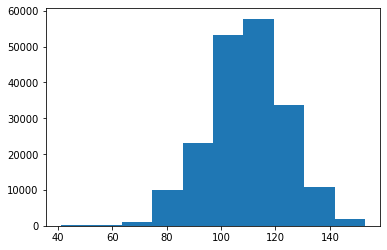

In [29]:
plt.hist(hie['FIQ']);

In [30]:
# roi = 'Brain Segmentation Volume'
#roi = 'Estimated Total Intracranial Volume'
roi = 'Brain Segmentation Volume (mm^3)'
roi = 'BVOL (mm^3)'
roiLabel = roi
# roi = 'Total gray matter volume'
# roi = 'cerebellar cortex'
# tool = 'surfer'
tool = 'ants'


tmp = hie[['study','ID','Gender','Age','structure','tool','volume','PIQ','FIQ','dx','softwareLabel']]
#tmp = hie[['study','ID','Gender', 'Age', 'structure','tool','volume', 'laterality', 'FIQ', 'PIQ']]
# tmp = tmp.loc[((hie['Gender']=='1') | (hie['Gender']=='Male')) 


lat_cond = ((hie['laterality'] == 'L')|(hie['laterality'] == 'Left')|(hie['laterality'] == 'Left'))
age_cond = (hie['Age'] <= 20)
roi_cond = (hie['softwareLabel'] == roiLabel)
tool_cond = (hie['tool'] == tooldic[tool])
fiq_cond = (hie['FIQ'] > 0 )

pop_cond = False
for pop in normalDev:
    # print(np.sum(pop_cond))
    pop_cond = pop_cond | (hie['dx'] == pop)
    # print(pop, np.sum(pop_cond))
#print(np.sum(pop_cond))
    
#pop_cond = (hie['dx'] == normalDev[0]) | (hie['dx'] == normalDev[1]) | (hie['dx'] == normalDev[2])

# site_cond = (hie['study'].str.contains("ABIDE"))
# site_cond = (hie['study']=="ADHD200")


condition = roi_cond &  pop_cond & fiq_cond & tool_cond  # & site_cond # & site_cond #& age_cond 

tmp = tmp.loc[condition].dropna(subset=['FIQ', 'volume', 'Gender']) # .drop_duplicates()
print(len(hie),len(tmp))

191998 458


In [31]:
#tmp.head(2)

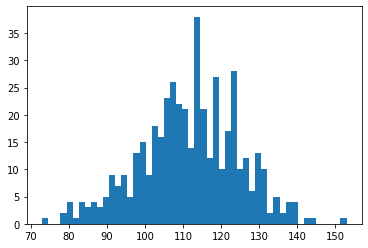

In [32]:
plt.hist(tmp['FIQ'], bins=50);

In [33]:
"""
# roi = 'Brain Segmentation Volume'
roi = 'Estimated Total Intracranial Volume'
softwareLabel = 'Brain Segmentation Volume (mm^3)'
# roi = 'Total gray matter volume'
# roi = 'cerebellar cortex'
tool = 'surfer'
# tool = 'ants'


tmp = hie[['study','ID','Gender','structure','tool','volume','PIQ','FIQ','dx','sofwareLabel']]
#tmp = hie[['study','ID','Gender', 'Age', 'structure','tool','volume', 'laterality', 'FIQ', 'PIQ']]
# tmp = tmp.loc[((hie['Gender']=='1') | (hie['Gender']=='Male')) 


# hand_cond = ((hie['hand'] == 'L')|(hie['hand'] == 'Left')|(hie['latera'] == 'Left'))
#age_cond = (hie['Age'] <= 20)
roi_cond = (hie['structure'] == h2ube[roi])
tool_cond = (hie['tool'] == tooldic[tool])

pop_cond = False
for pop in normalDev:
    pop_cond = pop_cond | (hie['dx'] == pop)
#pop_cond = (hie['dx'] == normalDev[0]) | (hie['dx'] == normalDev[1]) | (hie['dx'] == normalDev[2])



condition = roi_cond & tool_cond & pop_cond #& age_cond 

tmp = tmp.loc[condition].drop_duplicates().dropna()

print(len(hie),len(tmp))
""";

In [34]:
print(list(tmp))

['study', 'ID', 'Gender', 'Age', 'structure', 'tool', 'volume', 'PIQ', 'FIQ', 'dx', 'softwareLabel']


In [35]:
#tmp.head(7)

In [36]:
print(" Structure = ", roi)
#assert ube2h[tmp.iloc[0]['structure']] == roi

iq = 'FIQ'

# md = smf.ols(iq + " ~ Q('volume') + Gender + Age + study ", data=tmp) #  
md = smf.ols(iq + " ~ Q('volume') + study ", data=tmp) #  
mdf = md.fit()
print(mdf.summary())


 Structure =  BVOL (mm^3)
                            OLS Regression Results                            
Dep. Variable:                    FIQ   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     3.583
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           1.28e-06
Time:                        09:51:49   Log-Likelihood:                -1791.6
No. Observations:                 458   AIC:                             3621.
Df Residuals:                     439   BIC:                             3700.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [37]:
print(" Structure = ", roi)
# assert ube2h[tmp.iloc[0]['structure']] == roi

iq = 'PIQ'

md = smf.ols('volume' + " ~ Q(iq) + Gender + study ", data=tmp) #  
# md = smf.ols(iq + " ~ Q('volume') + study ", data=tmp) #  
mdf = md.fit()
print(mdf.summary())


 Structure =  BVOL (mm^3)
                            OLS Regression Results                            
Dep. Variable:                 volume   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     13.85
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           8.46e-30
Time:                        09:51:50   Log-Likelihood:                -5564.2
No. Observations:                 426   AIC:                         1.116e+04
Df Residuals:                     409   BIC:                         1.123e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

,study,ID,Gender,Age,structure,tool,volume,PIQ,FIQ,dx,softwareLabel
465,ABIDE SDSU Site,50195,Male,12.58,http://purl.obolibrary.org/obo/UBERON_0000955,http://stnava.github.io/ANTs/,1312940.0,129.0,123.0,2,BVOL (mm^3)
588,ABIDE SDSU Site,50193,Male,14.75,http://purl.obolibrary.org/obo/UBERON_0000955,http://stnava.github.io/ANTs/,1475770.0,114.0,112.0,2,BVOL (mm^3)
745,ABIDE SDSU Site,50206,Female,8.67,http://purl.obolibrary.org/obo/UBERON_0000955,http://stnava.github.io/ANTs/,1392320.0,103.0,112.0,2,BVOL (mm^3)


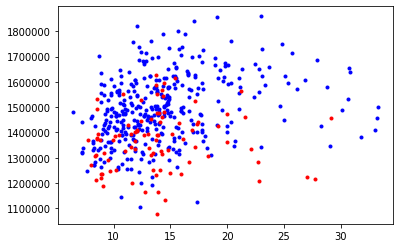

In [38]:
mergeddf = tmp
cond1 = (mergeddf['Gender']=='Male')
cond2 = (mergeddf['Gender']=='Female')
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(mergeddf.loc[cond1]['Age'], mergeddf.loc[cond1]['volume'], '.b')
ax1.plot(mergeddf.loc[cond2]['Age'], mergeddf.loc[cond2]['volume'], '.r')
mergeddf.head(3)


### conclusion : 
1. no significance for piq for what seems to be the closest region: Estimated Total Intracranial Volume
2. FIQ
Q('volume')                      0.0001      0.000      0.395      0.693      -0.001       0.001
Q(iq)                            2.6726      6.770      0.395      0.693     -10.636      15.981
3. PIQ:
Q('volume')                  -1.385e-05      0.000     -0.046      0.963      -0.001       0.001
Q(iq)                           -0.3830      8.283     -0.046      0.963     -16.666      15.900

In [39]:
set(hie['laterality'])

{'Left', 'Right', nan}

In [40]:
roi1 = 'hemisphere cerebral white matter volume'
roi2 = 'Total gray matter volume'
roi3 = 'CSF'

In [41]:
tmp = hie[['study','ID','Gender', 'Age', 'structure','tool','volume', 'laterality', 'FIQ', 'PIQ', 'dx']]

# conditions 
age_cond = (tmp['Age'] <= 20)
roi1_cond = (tmp['structure'] == h2ube[roi1]) & (tmp['laterality'] != 'Left') & (tmp['laterality'] != 'Right')
roi2_cond = (tmp['structure'] == h2ube[roi2])
roi3_cond = (tmp['structure'] == h2ube[roi3])
tool_cond = (tmp['tool']==tooldic[tool])

pop_cond = False
for pop in normalDev:
    pop_cond = pop_cond | (hie['dx'] == pop)

condition1 = roi1_cond & tool_cond & pop_cond # & age_cond   
condition2 = roi2_cond & tool_cond & pop_cond # & age_cond
condition3 = roi3_cond & tool_cond & pop_cond # & age_cond  

tmp1 = tmp.loc[condition1].drop_duplicates()
tmp2 = tmp.loc[condition2].drop_duplicates()
tmp3 = tmp.loc[condition3].drop_duplicates()

In [42]:
# CHECK THAT INDEX is unique !
print(len(tmp1), len(set(tmp1['ID'])))
print(len(tmp2), len(set(tmp2['ID'])))
print(len(tmp3), len(set(tmp3['ID'])))

458 458
0 0
458 458


In [43]:
#cols_to_use = tmp2.columns - tmp1.columns
#print(cols_to_use)
merged_inner = pd.merge(left=tmp1, right=tmp2[['ID','volume']], left_on='ID', right_on='ID', suffixes=('_1', '_2'))
merged_inner.head(3)


,study,ID,Gender,Age,structure,tool,volume_1,laterality,FIQ,PIQ,dx,volume_2


In [44]:
mergeddf = pd.merge(left=merged_inner, right=tmp3[['ID','volume']], 
                        left_on='ID', right_on='ID') #,suffixes=('_m', '_3'))
mergeddf.rename(columns={'volume':'volume_3'}, inplace=True)
mergeddf['total_volume'] = mergeddf['volume_1'] + mergeddf['volume_2'] + mergeddf['volume_3'] 
print(list(mergeddf))
print(len(mergeddf))


['study', 'Gender', 'Age', 'structure', 'tool', 'volume_1', 'laterality', 'FIQ', 'PIQ', 'dx', 'volume_2', 'ID', 'volume_3', 'total_volume']
0


In [45]:
iq = 'FIQ'
md = smf.ols(iq + " ~ Q('total_volume') + Gender + study + Age ", data=mergeddf) #  
mdf = md.fit()
print(mdf.summary())


ValueError: negative dimensions are not allowed

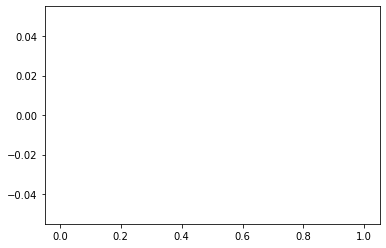

In [46]:
plt.hist(list(mergeddf['total_volume']), bins=50);

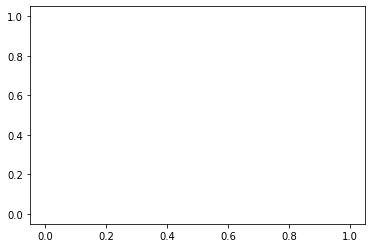

In [47]:
plt.plot(mergeddf['total_volume'],mergeddf['Age'],'.')

In [ ]:
cond1 = (mergeddf['Gender']=='Male')
cond2 = (mergeddf['Gender']=='Female')
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(mergeddf.loc[cond1]['Age'], mergeddf.loc[cond1]['total_volume'], '.b')
ax1.plot(mergeddf.loc[cond2]['Age'], mergeddf.loc[cond2]['total_volume'], '.r')

### MAC-1: Left striatum volume (caudate + putamen) will positively correlate with IQ in the total (male + female) child (age < 20) group.


In [48]:
roi1 = 'Caudate'
roi2 = 'Putamen'
roi3 = 'Estimated Total Intracranial Volume'
# roi = 'cerebellar cortex'
tool = 'surfer'
# tool = 'fsl'
# tool = 'ants'
# pick the interesting variables
#--------------------------------#
tmp = hie[['study','ID','Gender', 'Age','structure','tool','volume','laterality','FIQ','PIQ','dx','softwareLabel']]


# list of conditions
#---------------------#
#hand_cond = ((hie['laterality'] == 'L') | (hie['laterality'] == 'Left')) # | (hie['latera'] == 'Left'))
age_cond = (hie['Age'] <= 20)
roi1_cond = (hie['structure'] == h2ube[roi1])
roi2_cond = (hie['structure'] == h2ube[roi2])
# roi3_cond = (hie['structure'] == h2ube[roi3])

gender_cond =  (hie['Gender']=='Male')
site_cond = (hie['study'].str.contains("ABIDE"))
tool_cond = (hie['tool']==tooldic[tool])
laterality_cond = (hie['laterality']=='Left')
pop_cond = False
for pop in normalDev:
    # print(np.sum(pop_cond))
    pop_cond = pop_cond | (hie['dx'] == pop)
    #print(pop, np.sum(pop_cond))
#print(np.sum(pop_cond))

condition1 = roi1_cond & tool_cond & age_cond & laterality_cond & pop_cond # & gender_cond # & site_cond # 
condition2 = roi2_cond & tool_cond & age_cond & laterality_cond & pop_cond # & gender_cond # & site_cond #  

# condition3 = roi3_cond & tool_cond & age_cond

tmp1 = tmp.loc[condition1] #.drop_duplicates()
tmp2 = tmp.loc[condition2] #.drop_duplicates()
# tmp3 = tmp.loc[condition3].drop_duplicates()

#tmp1 = tmp1.set_index('ID')
#tmp2 = tmp2.set_index('ID')

# print(len(hie))
print(roi1, ': tmp1', len(tmp1), len(tmp1.drop_duplicates()))
print(roi2, ': tmp2', len(tmp2), len(tmp2.drop_duplicates()))
#print(roi3, ': tmp3', len(tmp3), len(tmp3.drop_duplicates()))
#h2ube[roi3]

Caudate : tmp1 409 409
Putamen : tmp2 409 409


In [49]:
# Add these two and sum columns
suffixes=('_caud','_puta')
indx = 'ID'
roi1_roi2 = pd.merge(left=tmp1, right=tmp2[['ID','volume']], 
                            left_on=indx, right_on=indx, suffixes=suffixes)
roi1_roi2.dropna(subset=['FIQ'])
roi1_roi2['striatum'] = roi1_roi2['volume_caud'] + roi1_roi2['volume_puta']
roi1_roi2.drop(columns=['volume_caud','volume_puta'],inplace=True)

In [50]:
#roi1_roi2.head(2)

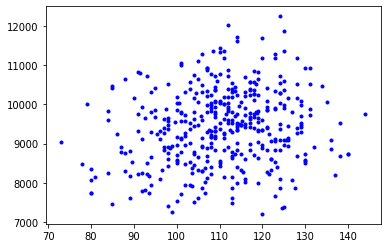

In [51]:
plt.plot(roi1_roi2['FIQ'],roi1_roi2['striatum'],'.b')

In [52]:
iq = 'FIQ'
md = smf.ols(iq + " ~ Q('striatum') + study ", data=roi1_roi2) #  
mdf = md.fit()
print(mdf.summary())


                            OLS Regression Results                            
Dep. Variable:                    FIQ   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.807
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           0.000180
Time:                        09:53:37   Log-Likelihood:                -1587.0
No. Observations:                 409   AIC:                             3210.
Df Residuals:                     391   BIC:                             3282.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [53]:
def split_merge_df(df, indx='ID', spliton='laterality', levels=['Left','Right'], keep_col='volume', droplist=[]):
    """
    split the df according to 2 levels of "spliton", 
    take the column "keep_col" now split in two, and create a new one with the sum of the values
    such that keep_col splitted values are added in a new column
    
    used for adding volumes in right and left structures
    """
    
    dflev1 = df[df[spliton]==levels[0]]
    dflev2 = df[df[spliton]==levels[1]]
    # same indx 
    assert set(dflev1[indx]) == set(dflev2[indx])
    # no duplicates in the indx
    assert len(set(dflev1[indx])) == len(dflev1[indx])
    # assert len(set(dflev2[indx])) == len(dflev2[indx])
    suffixes=('_l','_r')
    merged_inner = pd.merge(left=dflev1, right=dflev2[[indx,keep_col]], 
                            left_on=indx, right_on=indx, suffixes=suffixes)
#    merged_inner.rename(columns={cols+'_x': cols+'_'+lev1, cols+'_y': cols+'_'+lev2}, inplace=True)


    # sum keep_col values in a new column
    add_col_name = keep_col+suffixes[0]+'+'+suffixes[1]
    merged_inner[add_col_name] = \
                        merged_inner[keep_col+suffixes[0]] + merged_inner[keep_col+suffixes[1]]  

    if droplist != []:
        for colname in droplist:
            colname_y = colname + '_y'
            colname_x = colname + '_x'
            merged_inner.drop(colname_y, axis=1, inplace=True)
            merged_inner.rename(columns={colname_x: colname}, inplace=True)
    
    return merged_inner

In [54]:
tmp1_merged = split_merge_df(tmp1, indx='ID', spliton='laterality', levels=['Left','Right'])
tmp2_merged = split_merge_df(tmp1, indx='ID', spliton='laterality', levels=['Left','Right'])


AssertionError: 

In [ ]:
tmp2_merged.head(2)

In [ ]:
# Add these two and sum columns
suffixes=('_1','_2')
indx = 'ID'
roi1_roi2 = pd.merge(left=tmp1_merged, right=tmp2_merged[['ID','volume_l+_r']], 
                            left_on=indx, right_on=indx, suffixes=suffixes)


In [ ]:
print(list(roi1_roi2))


In [ ]:
roi1_roi2['caud+put'] = roi1_roi2['volume_l+_r_1'] + roi1_roi2['volume_l+_r_2']  

In [ ]:
print(list(roi1_roi2))


In [ ]:
# add intracranial brain volume
tmp3.rename(columns={'volume':'TBV'}, inplace=True)
roi1_roi2_roi3 = pd.merge(left=roi1_roi2, right=tmp3[['ID','TBV']], 
                            left_on=indx, right_on=indx, suffixes=['_1','_2'])
print(list(roi1_roi2_roi3))

In [ ]:
iq = 'PIQ'
#md = smf.ols(iq + " ~ Q('caud+put') + Gender + study + TBV ", data=roi1_roi2_roi3) #  
md = smf.ols(iq + " ~ Q('caud+put') ", data=roi1_roi2_roi3) #  
mdf = md.fit()
print(mdf.summary())


In [ ]:
plt.hist(list(roi1_roi2['caud+put']), bins=50);

In [ ]:
iq = 'FIQ'
#md = smf.ols(iq + " ~ Q('caud+put') + Gender + study + TBV ", data=roi1_roi2_roi3) #  
md = smf.ols(iq + " ~ Q('caud+put') ", data=roi1_roi2_roi3) #  
mdf = md.fit()
print(mdf.summary())



### Conclusion

nothing?


### MAC-2: Left striatum volume (caudate + putamen) will positively correlate with IQ in the male children group.


In [55]:
set(hie['Gender'])

{'Female', 'Male'}

In [56]:
roi1 = 'Caudate'
roi2 = 'Putamen'
roi3 = 'Estimated Total Intracranial Volume'
# roi = 'cerebellar cortex'
tool = 'surfer'

# list of conditions
#---------------------#
hand_cond = (hie['laterality'] == 'Left')
age_cond = (hie['Age'] <= 20)
roi1_cond = (hie['structure'] == h2ube[roi1])
roi2_cond = (hie['structure'] == h2ube[roi2])
roi3_cond = (hie['structure'] == h2ube[roi3])

tool_cond = (hie['tool'] == tooldic[tool])

gender_cond = (hie['Gender'] == 'Male')

condition1 = roi1_cond & tool_cond & age_cond & hand_cond & gender_cond
condition2 = roi2_cond & tool_cond & age_cond & hand_cond & gender_cond
condition3 = roi3_cond & tool_cond & age_cond & gender_cond

tmp1 = tmp.loc[condition1].drop_duplicates()
tmp2 = tmp.loc[condition2].drop_duplicates()
tmp3 = tmp.loc[condition3].drop_duplicates()

#tmp1 = tmp1.set_index('ID')
#tmp2 = tmp2.set_index('ID')

print(len(hie))
print(roi1, ': tmp1', len(tmp1), len(tmp1.drop_duplicates()))
print(roi2, ': tmp2', len(tmp2), len(tmp2.drop_duplicates()))
print(roi3, ': tmp3', len(tmp3), len(tmp3.drop_duplicates()))
h2ube[roi3]

191998
Caudate : tmp1 735 735
Putamen : tmp2 735 735
Estimated Total Intracranial Volume : tmp3 735 735


'http://purl.obolibrary.org/obo/UBERON_0013411'

In [57]:
print(list(tmp1))

['study', 'ID', 'Gender', 'Age', 'structure', 'tool', 'volume', 'laterality', 'FIQ', 'PIQ', 'dx', 'softwareLabel']


In [58]:
caud_put = pd.merge(left=tmp1, right=tmp2[['ID','volume']], 
                            left_on=indx, right_on=indx, suffixes=('_caud','_put'))
print(list(caud_put))
set(caud_put['laterality'])

['study', 'ID', 'Gender', 'Age', 'structure', 'tool', 'volume_caud', 'laterality', 'FIQ', 'PIQ', 'dx', 'softwareLabel', 'volume_put']


{'Left'}

In [59]:
caud_put_tiv = pd.merge(left=caud_put, right=tmp3[['ID','volume']],
                     left_on=indx, right_on=indx, suffixes=('','_tiv'))
caud_put_tiv.rename(columns={'volume':'TIV'}, inplace=True)
caud_put_tiv['caud+put'] = caud_put_tiv['volume_caud'] + caud_put_tiv['volume_put']  
print(list(caud_put_tiv))


['study', 'ID', 'Gender', 'Age', 'structure', 'tool', 'volume_caud', 'laterality', 'FIQ', 'PIQ', 'dx', 'softwareLabel', 'volume_put', 'TIV', 'caud+put']


In [60]:
iq = 'PIQ'
# md = smf.ols(iq + " ~ Q('caud+put') + TIV + study", data=caud_put_tiv) #  
md = smf.ols(iq + " ~ Q('caud+put') + study", data=caud_put_tiv) #  
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     4.955
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           1.95e-09
Time:                        09:54:08   Log-Likelihood:                -3909.3
No. Observations:                 953   AIC:                             7851.
Df Residuals:                     937   BIC:                             7928.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

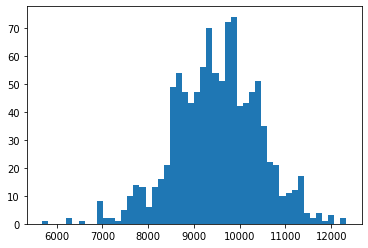

In [61]:
plt.hist(list(caud_put_tiv['caud+put']), bins=50);

### MAC-3: Left striatum volume (caudate + putamen) will not correlate with IQ in the female children group.


In [62]:
roi1 = 'Caudate'
roi2 = 'Putamen'
roi3 = 'Estimated Total Intracranial Volume'
# roi = 'cerebellar cortex'
tool = 'surfer'

# list of conditions
#---------------------#
hand_cond = (hie['laterality'] == 'Left')
age_cond = (hie['Age'] <= 20)
roi1_cond = (hie['structure'] == h2ube[roi1])
roi2_cond = (hie['structure'] == h2ube[roi2])
roi3_cond = (hie['structure'] == h2ube[roi3])

tool_cond = (hie['tool'] == tooldic[tool])

gender_cond = (hie['Gender'] == 'Female')

condition1 = roi1_cond & tool_cond & age_cond & hand_cond & gender_cond
condition2 = roi2_cond & tool_cond & age_cond & hand_cond & gender_cond
condition3 = roi3_cond & tool_cond & age_cond & gender_cond

tmp1 = tmp.loc[condition1].drop_duplicates()
tmp2 = tmp.loc[condition2].drop_duplicates()
tmp3 = tmp.loc[condition3].drop_duplicates()

#tmp1 = tmp1.set_index('ID')
#tmp2 = tmp2.set_index('ID')

print(len(hie))
print(roi1, ': tmp1', len(tmp1), len(tmp1.drop_duplicates()))
print(roi2, ': tmp2', len(tmp2), len(tmp2.drop_duplicates()))
print(roi3, ': tmp3', len(tmp3), len(tmp3.drop_duplicates()))
h2ube[roi3]

191998
Caudate : tmp1 184 184
Putamen : tmp2 184 184
Estimated Total Intracranial Volume : tmp3 184 184


'http://purl.obolibrary.org/obo/UBERON_0013411'

In [63]:
caud_put = pd.merge(left=tmp1, right=tmp2[['ID','volume']], 
                            left_on=indx, right_on=indx, suffixes=('_caud','_put'))
print(list(caud_put))
set(caud_put['laterality'])

caud_put_tiv = pd.merge(left=caud_put, right=tmp3[['ID','volume']],
                     left_on=indx, right_on=indx, suffixes=('','_tiv'))
caud_put_tiv.rename(columns={'volume':'TIV'}, inplace=True)
caud_put_tiv['caud+put'] = caud_put_tiv['volume_caud'] + caud_put_tiv['volume_put']  
print(list(caud_put_tiv))


['study', 'ID', 'Gender', 'Age', 'structure', 'tool', 'volume_caud', 'laterality', 'FIQ', 'PIQ', 'dx', 'softwareLabel', 'volume_put']
['study', 'ID', 'Gender', 'Age', 'structure', 'tool', 'volume_caud', 'laterality', 'FIQ', 'PIQ', 'dx', 'softwareLabel', 'volume_put', 'TIV', 'caud+put']


In [64]:
iq = 'PIQ'
# md = smf.ols(iq + " ~ Q('caud+put') + TIV + study", data=caud_put_tiv) #  
md = smf.ols(iq + " ~ Q('caud+put') + TIV + study", data=caud_put_tiv) #  
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.332
Date:                Tue, 26 Nov 2019   Prob (F-statistic):              0.194
Time:                        09:54:12   Log-Likelihood:                -1135.5
No. Observations:                 281   AIC:                             2299.
Df Residuals:                     267   BIC:                             2350.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

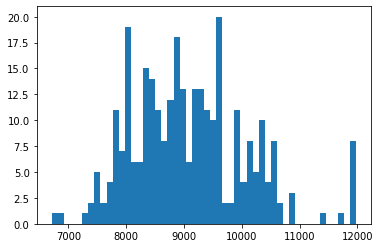

In [65]:
plt.hist(list(caud_put_tiv['caud+put']), bins=50);

### GANJ-1: Total Corpus Callosum midsagittal area, after correcting for total brain volume, will negatively correlate with IQ.


In [73]:
tmp = hie[['study','ID','Gender', 'Age', 'structure','tool','volume', 'laterality', 'FIQ', 'PIQ']]

roi1 = 'CC_Anterior'
roi2 = 'CC_Central'
roi3 = 'CC_Posterior'
tiv = 'Estimated Total Intracranial Volume'
wm = 'hemisphere cerebral white matter volume'
gm = 'Total gray matter volume'
csf = 'CSF'
# roi = 'cerebellar cortex'
tool = 'surfer'

# list of conditions
#---------------------#
# hand_cond = (hie['laterality'] == 'Left')
# age_cond = (hie['Age'] <= 20)
roi1_cond = (tmp['structure'] == h2ube[roi1])
roi2_cond = (tmp['structure'] == h2ube[roi2])
roi3_cond = (tmp['structure'] == h2ube[roi3])
tool_cond = (tmp['tool'] == tooldic[tool])
# gender_cond = (hie['Gender'] == 'Female')

wm_cond = (tmp['structure'] == h2ube[wm]) & (tmp['laterality'] != 'Left') & (tmp['laterality'] != 'Right')
gm_cond = (tmp['structure'] == h2ube[gm])
csf_cond = (tmp['structure'] == h2ube[csf])
tiv_cond = (tmp['structure'] == h2ube[tiv])


# gender_cond =  (hie['Gender']=='Male')
# site_cond = (hie['study'].str.contains("ABIDE"))
tool_cond = (hie['tool']==tooldic[tool])
# laterality_cond = (hie['laterality']=='Left')
pop_cond = False
for pop in normalDev:
    # print(np.sum(pop_cond))
    pop_cond = pop_cond | (hie['dx'] == pop)
    #print(pop, np.sum(pop_cond))
#print(np.sum(pop_cond))

#condition1 = roi1_cond & tool_cond & age_cond & laterality_cond & pop_cond # & gender_cond # & site_cond # 
#condition2 = roi2_cond & tool_cond & age_cond & laterality_cond & pop_cond # & gender_cond # & site_cond #  



condition1 = roi1_cond & tool_cond & pop_cond
condition2 = roi2_cond & tool_cond & pop_cond
condition3 = roi3_cond & tool_cond & pop_cond

condition_wm = wm_cond & tool_cond & pop_cond
condition_gm = gm_cond & tool_cond & pop_cond
condition_csf = csf_cond & tool_cond & pop_cond
condition_tiv = tiv_cond & tool_cond & pop_cond

tmp1 = tmp.loc[condition1].drop_duplicates()
tmp2 = tmp.loc[condition2].drop_duplicates()
tmp3 = tmp.loc[condition3].drop_duplicates()

wm_df = tmp.loc[condition_wm].drop_duplicates()
gm_df = tmp.loc[condition_gm].drop_duplicates()
csf_df = tmp.loc[condition_csf].drop_duplicates()
tiv_df = tmp.loc[condition_tiv].drop_duplicates()

#tmp1 = tmp1.set_index('ID')
#tmp2 = tmp2.set_index('ID')

print(len(hie))
print(roi1, ': tmp1', len(tmp1), len(tmp1.drop_duplicates()))
print(roi2, ': tmp2', len(tmp2), len(tmp2.drop_duplicates()))
print(roi3, ': tmp3', len(tmp3), len(tmp3.drop_duplicates()))
print(wm, ': wm_df', len(wm_df), len(wm_df.drop_duplicates()))
print(gm, ': gm_df', len(gm_df), len(gm_df.drop_duplicates()))
print(csf, ': csf_df', len(csf_df), len(csf_df.drop_duplicates()))
print(tiv, ': tiv_df', len(tiv_df), len(tiv_df.drop_duplicates()))


191998
CC_Anterior : tmp1 515 515
CC_Central : tmp2 515 515
CC_Posterior : tmp3 515 515
hemisphere cerebral white matter volume : wm_df 515 515
Total gray matter volume : gm_df 515 515
CSF : csf_df 515 515
Estimated Total Intracranial Volume : tiv_df 515 515


In [74]:
brain_tmp = pd.merge(left=gm_df, right=wm_df[['ID','volume']], left_on='ID', right_on='ID', suffixes=('_gm','_wm'))
brain_df = pd.merge(left=brain_tmp, right=csf_df[['ID','volume']], left_on='ID', right_on='ID')
brain_df.rename(columns={'volume':'volume_csf'}, inplace=True)
brain_df['total_brain_vol'] = brain_df['volume_gm'] + brain_df['volume_wm'] + brain_df['volume_csf']
brain_df.drop(['volume_gm', 'volume_wm', 'volume_csf'], axis=1, inplace=True)
print(list(brain_df))

['study', 'ID', 'Gender', 'Age', 'structure', 'tool', 'laterality', 'FIQ', 'PIQ', 'total_brain_vol']


In [75]:
CC_tmp = pd.merge(left=tmp1, right=tmp2[['ID','volume']], left_on='ID', right_on='ID', suffixes=('_ant','_cent'))
CC_df = pd.merge(left=CC_tmp, right=tmp3[['ID','volume']], left_on='ID', right_on='ID')
CC_df.rename(columns={'volume':'volume_post'}, inplace=True)
CC_df['cc_vol'] = CC_df['volume_ant'] +CC_df['volume_cent'] + CC_df['volume_post']
CC_df.drop(['volume_ant', 'volume_cent', 'volume_post'], axis=1, inplace=True)
print(list(CC_df))


['study', 'ID', 'Gender', 'Age', 'structure', 'tool', 'laterality', 'FIQ', 'PIQ', 'cc_vol']


In [76]:
CC_brain_df = pd.merge(left=CC_df, right=brain_df[['ID','total_brain_vol']], left_on='ID', right_on='ID')
print(list(CC_brain_df))

CC_brain_tiv = pd.merge(left=CC_brain_df, right=tiv_df[['ID','volume']], left_on='ID', right_on='ID')
CC_brain_tiv.rename(columns={'volume':'TIV'}, inplace=True)
print(list(CC_brain_tiv))

['study', 'ID', 'Gender', 'Age', 'structure', 'tool', 'laterality', 'FIQ', 'PIQ', 'cc_vol', 'total_brain_vol']
['study', 'ID', 'Gender', 'Age', 'structure', 'tool', 'laterality', 'FIQ', 'PIQ', 'cc_vol', 'total_brain_vol', 'TIV']


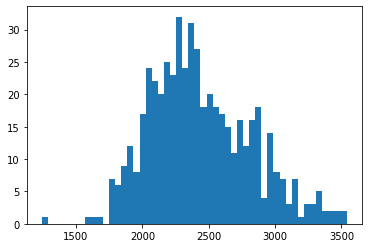

In [77]:
plt.hist(CC_brain_df['cc_vol'],bins=50);

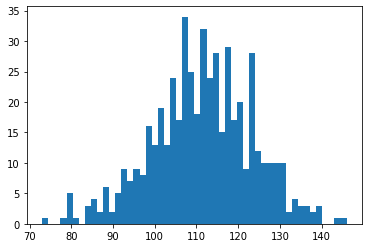

In [78]:
plt.hist(CC_brain_df['FIQ'],bins=50);

In [80]:
iq = 'FIQ'
# md = smf.ols(iq + " ~ Q('caud+put') + TIV + study", data=caud_put_tiv) #  
#md = smf.ols(iq + " ~ Q('cc_vol') + total_brain_vol + TIV + study", data=CC_brain_tiv) #  
md = smf.ols(iq + " ~ Q('cc_vol')  + study + total_brain_vol", data=CC_brain_tiv) #  
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                    FIQ   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.915
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           1.34e-05
Time:                        10:01:43   Log-Likelihood:                -1983.8
No. Observations:                 515   AIC:                             4014.
Df Residuals:                     492   BIC:                             4111.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### GANJ-2: Total Corpus Callosum midsagittal area, after correcting for total brain volume, will negatively correlate with IQ in the young (age < 12) group.


In [ ]:
print(list(CC_brain_tiv))

In [ ]:
age_cond = (CC_brain_tiv['Age'] <= 12)
tmp = CC_brain_tiv.loc[age_cond]

md = smf.ols(iq + " ~ Q('cc_vol') + total_brain_vol + study ", data=tmp)
mdf = md.fit()
print(mdf.summary())